In [1]:
import matplotlib.pyplot as plt
# Create labels for the x-axis (temperature ranges)
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import sys
sys.path.insert(0,'/cluster/work/climate/dnikolo/n2o')
from Glaciation_time_estimator.Auxiliary_func.config_reader import read_config
from Glaciation_time_estimator.Data_postprocessing.Job_result_fp_generator import generate_tracking_filenames

In [2]:
config=read_config('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimator/config.yaml')
t_deltas = config['t_deltas']
agg_fact = config['agg_fact']
min_temp_array, max_temp_array = config['min_temp_arr'],config['max_temp_arr']
folder_name=f"{config['start_time'].strftime(config['time_folder_format'])}_{config['end_time'].strftime(config['time_folder_format'])}"

Load data

In [6]:
def Extract_array_from_df(series:pd.Series):
    if series.empty:
        return None
    return np.stack(series.values)

In [7]:
cloud_properties_df_list=[]
for i in range(len(min_temp_array)):
    cloud_properties_df_list.append([])
    min_temp=min_temp_array[i]
    max_temp=max_temp_array[i]
    for pole in config["pole_folders"]:
        fp=os.path.join(config['postprocessing_output_dir'],pole,folder_name,f"Agg_{agg_fact:02}_T_{abs(round(min_temp)):02}_{abs(round(max_temp)):02}.parquet")
        cloud_properties_df_list[i].append(pd.read_parquet(fp))

Spaghetti plots

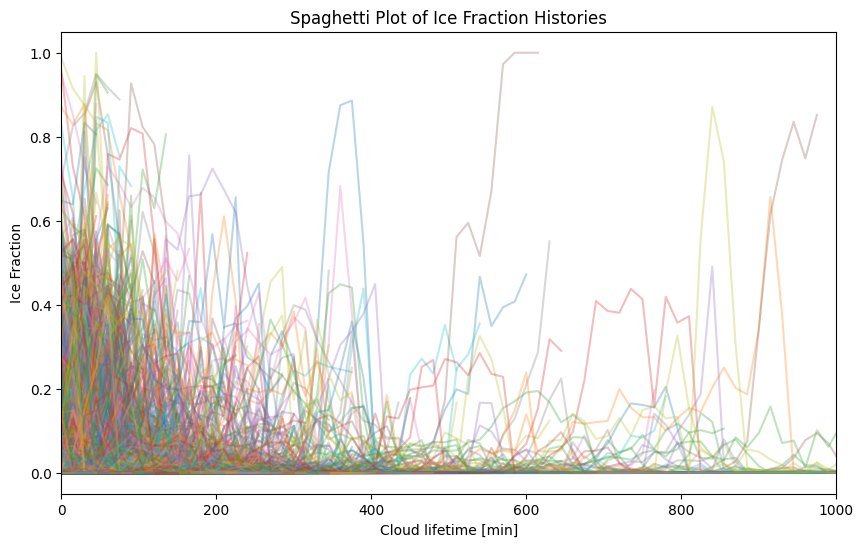

In [8]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Loop through each row and plot the lists in 'ice_frac_hist'
for i, row in cloud_properties_df_list[1][1].iterrows():
    ice_frac_hist = row['ice_frac_hist']
    plt.plot(np.arange(len(ice_frac_hist))*15, ice_frac_hist, alpha=0.3)  # Add alpha for transparency to better visualize overlaps

# Add labels and title
plt.xlabel('Cloud lifetime [min]')
plt.ylabel('Ice Fraction')
plt.title('Spaghetti Plot of Ice Fraction Histories')
plt.xlim(0,1000)
# Show the plot
plt.show()

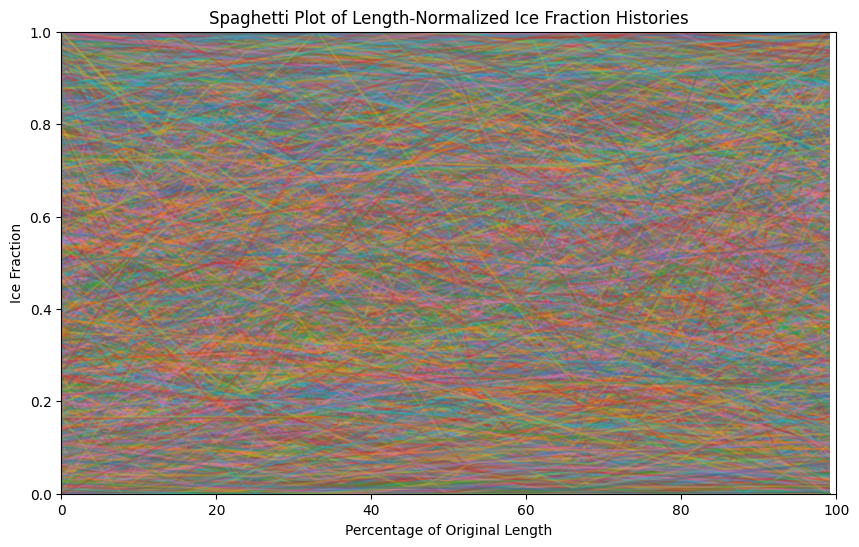

In [17]:

# Assuming your DataFrame is named df and the column with lists is 'ice_frac_hist'
plt.figure(figsize=(10, 6))

# Iterate through the list of DataFrames
for df_ind in range(len(cloud_properties_df_list)):
    df = cloud_properties_df_list[df_ind][1]

    # Determine the number of points to normalize to (e.g., 100 points for percentages)
    normalized_length = 100

    # Normalize each list to the same length using interpolation
    normalized_ice_frac_hist = []
    for lst in df['ice_frac_hist']:
        original_indices = np.linspace(0, 1, len(lst))
        target_indices = np.linspace(0, 1, normalized_length)
        normalized_list = np.interp(target_indices, original_indices, lst)
        normalized_ice_frac_hist.append(normalized_list)

    df['normalized_ice_frac_hist'] = normalized_ice_frac_hist

    # Define a color for this DataFrame based on its index
    color = plt.cm.rainbow(df_ind / len(cloud_properties_df_list))

    # Loop through each row and plot the normalized lists in 'normalized_ice_frac_hist'
    for i, row in df.iterrows():
        ice_frac_hist = row['normalized_ice_frac_hist']
        plt.plot(range(len(ice_frac_hist)), ice_frac_hist, alpha=0.3)  # Add alpha for transparency and color coding

# Add labels, title, and color bar
# sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=len(cloud_properties_df_list)))
# cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
# cbar.set_label('Temperature range')
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.xlabel('Percentage of Original Length')
plt.ylabel('Ice Fraction')
plt.title('Spaghetti Plot of Length-Normalized Ice Fraction Histories')

# Save the plot
filename = "/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimator/Result_graphs/Spaghetti_plot_normalized_lifetime1"
plt.savefig(filename + ".pdf", dpi=400)
plt.savefig(filename + ".png", dpi=400)

# Show the plot
plt.show()

0
54430


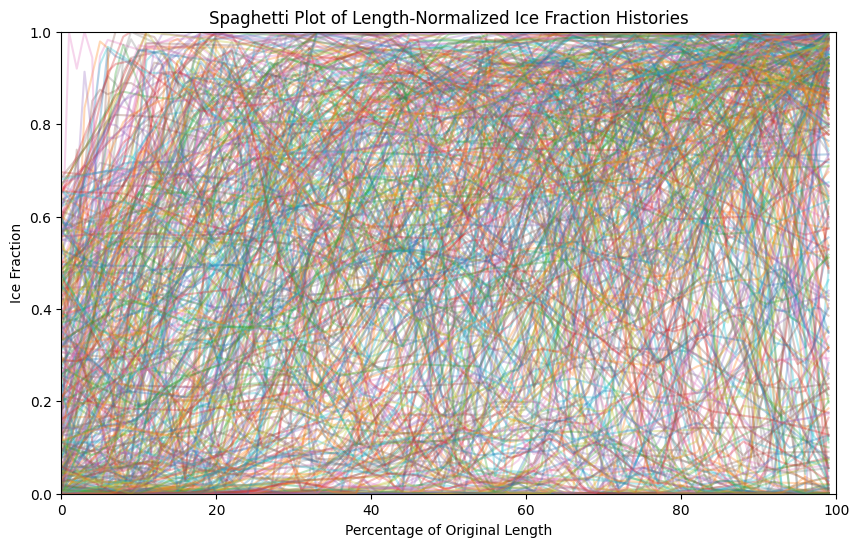

In [10]:
# Assuming your DataFrame is named df and the column with lists is 'ice_frac_hist'
plt.figure(figsize=(10, 6))
err_count=0
count = 0
for df_ind in range(len(cloud_properties_df_list)):
    df = cloud_properties_df_list[df_ind][1]
    # Assuming your DataFrame is named df and the column with lists is 'ice_frac_hist'

    # Determine the number of points to normalize to (e.g., 100 points for percentages)
    normalized_length = 100

    # Normalize each list to the same length using interpolation
    normalized_ice_frac_hist = []
    for lst in df['ice_frac_hist']:
        original_indices = np.linspace(0, 1, len(lst))
        target_indices = np.linspace(0, 1, normalized_length)
        normalized_list = np.interp(target_indices, original_indices, lst)
        normalized_ice_frac_hist.append(normalized_list)

    df['normalized_ice_frac_hist'] = normalized_ice_frac_hist

    # Create the figure and axis
    

    # Loop through each row and plot the normalized lists in 'normalized_ice_frac_hist'
    for i, row in df.iterrows():
        ice_frac_hist = row['normalized_ice_frac_hist']
        count+=1
        if len(row['ice_frac_hist'])-1 != int(row['track_length']/timedelta(minutes=15)):
            err_count+=1
            print(len(row['ice_frac_hist']) , row['track_length']/timedelta(minutes=15))
        if row['track_length']>timedelta(hours=2):
            if max(ice_frac_hist) > 0.3:
                if max(ice_frac_hist) > ice_frac_hist[0]+0.3:
                    if max(ice_frac_hist) > 0.9:
                        plt.plot(range(len(ice_frac_hist)), ice_frac_hist, alpha=0.3)  # Add alpha for transparency to better visualize overlaps
print(err_count)
print(count)
# Add labels and title
plt.xlim(0,100)
plt.ylim(0,1)
plt.xlabel('Percentage of Original Length')
plt.ylabel('Ice Fraction')
plt.title('Spaghetti Plot of Length-Normalized Ice Fraction Histories')
filename="/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimator/Result_graphs/Spaghetti_plot_normalized_lifetime2"
plt.savefig(filename+".pdf", dpi=400)
plt.savefig(filename+".png", dpi=400)
# Show the plot
plt.show()


In [20]:
def check_cloud(row, params):   
    norm_ice_frac_hist = row['normalized_ice_frac_hist']
    if (max(norm_ice_frac_hist) > params['crit_max_IF']) and np.argmax(np.array(row['ice_frac_hist']))+1>=params['min_time_to_max'] and row['track_length']>params['crit_lifetime'] and (max(norm_ice_frac_hist) > ice_frac_hist[0]+params['min_delta_IF']):
        return True
    return False

params = {
    'crit_max_IF': 0.5,
    'crit_lifetime': timedelta(hours=2),
    'min_delta_IF': 0.3,
    'min_time_to_max': 4
}
    

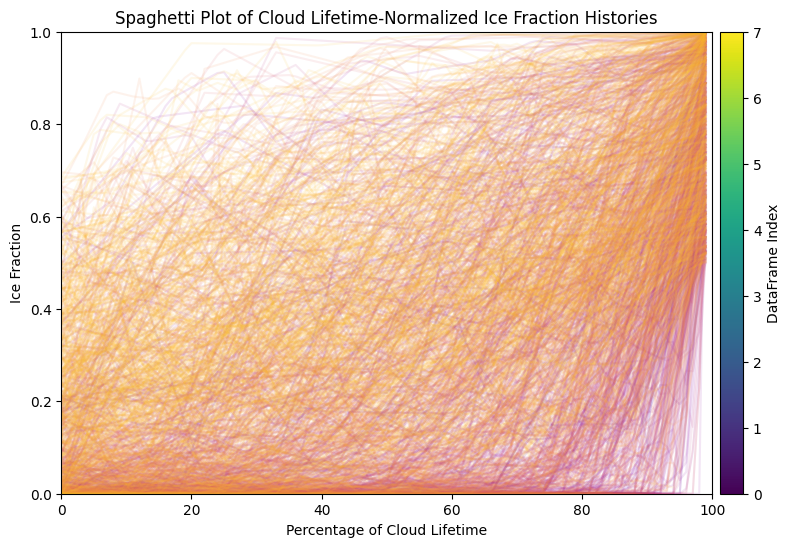

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named df and the column with lists is 'ice_frac_hist'
plt.figure(figsize=(10, 6))

# Iterate through the list of DataFrames
for df_ind in range(len(cloud_properties_df_list)):
    df = cloud_properties_df_list[df_ind][1]

    # Determine the number of points to normalize to (e.g., 100 points for percentages)
    normalized_length = 100

    # Normalize each list between its start and its maximum value
    normalized_ice_frac_hist = []
    rapid_growth = []
    for lst in df['ice_frac_hist']:
        max_val = np.max(lst)
        if max_val == 0:
            normalized_list = np.zeros(normalized_length)
            rapid_growth.append(False)
        else:
            max_idx = np.argmax(lst)
            original_indices = np.linspace(0, max_idx, len(lst[:max_idx + 1]))
            target_indices = np.linspace(0, max_idx, normalized_length)
            normalized_list = np.interp(target_indices, original_indices, lst[:max_idx + 1])
            normalized_list = np.pad(normalized_list, (0, normalized_length - len(normalized_list)), constant_values=np.nan)

            # Mark as False if the maximum is reached in less than 4 timesteps
            rapid_growth.append(max_idx + 1 >= 4)

        normalized_ice_frac_hist.append(normalized_list)

    df['normalized_ice_frac_hist'] = normalized_ice_frac_hist
    df['rapid_growth'] = rapid_growth

    # Define a color for this DataFrame based on its index
    color = plt.cm.plasma(df_ind / len(cloud_properties_df_list))

    # Loop through each row and plot the normalized lists in 'normalized_ice_frac_hist'
    for i, row in df.iterrows():
        if check_cloud(row):
            ice_frac_hist = row['normalized_ice_frac_hist']
            plt.plot(range(len(ice_frac_hist)), ice_frac_hist, alpha=0.1, color=color)  # Add alpha for transparency and color coding

# Add labels, title, and color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=len(cloud_properties_df_list)))
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
cbar.set_label('DataFrame Index')
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.xlabel('Percentage of Cloud Lifetime')
plt.ylabel('Ice Fraction')
plt.title('Spaghetti Plot of Cloud Lifetime-Normalized Ice Fraction Histories')

# Save the plot
filename = "/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimator/Result_graphs/Spaghetti_plot_normalized_lifetime3"
plt.savefig(filename + ".pdf", dpi=400)
plt.savefig(filename + ".png", dpi=400)

# Show the plot
plt.show()
